In [1]:
import geopandas
import scipy.io
import numpy as np
from EchoPro import EchoPro
epro_2019 = EchoPro(init_file_path='./config_files/initialization_config.yml',
                    survey_year_file_path='./config_files/survey_year_2019_config.yml',
                    source=3,
                    bio_data_type=1,
                    age_data_status=1, 
                    exclude_age1=True)

A check of the initialization file needs to be done!
A check of the survey year file needs to be done!
Loading biological data ...


/Users/brandonreyes/UW_work/EchoPro_work/EchoPro/EchoPro/echo_pro.py:274: UserWarning: We are currently using wgt_total from Matlab for CV, change this!
  warnings.warn("We are currently using wgt_total from Matlab for CV, change this!")


In [2]:
# get example data from Matlab version of EchoPro
mat = scipy.io.loadmat('../2019_consolidated_files/variogram_data.mat')

positions = mat['variogram_data'][:, :2]  # (x,y)
field = mat['variogram_data'][:, 2]   # biomass density

In [3]:
# setup bins for semi-variogram calculation
nlag = 30 
lag_res = 0.002
bins_center = lag_res*np.arange(nlag)

bins = [bins_center[0] - lag_res/2.0]
for i in range(nlag):
    
    bins.append(bins_center[i] + lag_res/2.0)

In [4]:
# get semi-variogram class
semi_vario = epro_2019.get_semi_variogram(positions[:, 0], 
                                          positions[:, 1], field)

In [5]:
standardized_gamma = semi_vario.calculate_semi_variogram(bins)
standardized_gamma

array([0.55957167, 0.27871057, 0.5017043 , 0.6285182 , 0.81699518,
       0.84807799, 0.85626063, 0.88805541, 0.87678417, 0.89532938,
       0.925526  , 0.92969017, 0.92621991, 0.93359212, 0.94452939,
       0.94982919, 0.92340754, 0.91565693, 0.93720898, 0.96212605,
       0.94361212, 0.93675056, 0.96621628, 0.97465567, 0.97700998,
       0.96146162, 0.98101481, 0.98020469, 0.98974528, 0.95736852])

In [17]:
import scipy.io
import numpy as np 
import gstools as gs 
# get example data from Matlab version of EchoPro
mat = scipy.io.loadmat('../2019_consolidated_files/variogram_data.mat')

positions = mat['variogram_data'][:, :2].T  # (x,y)
field = mat['variogram_data'][:, 2]   # biomass density

In [18]:
bin_center, gamma, counts = gs.vario_estimate(positions, 
                                              field, 
                                              bin_edges=bins, 
                                              return_counts=True,
#                                               direction=[np.array([0.0, np.pi/2.0])],
                                              angles_tol=np.deg2rad(360))  #np.pi/8.0)

print(bin_center)
print(gamma)
print(counts)

[0.    0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022
 0.024 0.026 0.028 0.03  0.032 0.034 0.036 0.038 0.04  0.042 0.044 0.046
 0.048 0.05  0.052 0.054 0.056 0.058]
[3.57717036e+09 4.65214626e+09 8.42468080e+09 1.08288076e+10
 1.66179716e+10 1.80524853e+10 1.72589497e+10 1.85059687e+10
 1.78783589e+10 1.87567449e+10 1.97509340e+10 1.95448097e+10
 2.03615810e+10 2.08634261e+10 2.13274974e+10 2.15516563e+10
 1.96963175e+10 2.02339895e+10 2.07628702e+10 2.14268730e+10
 2.13905584e+10 2.13628886e+10 2.22525569e+10 2.19212463e+10
 2.24221998e+10 2.21505102e+10 2.22161011e+10 2.16240135e+10
 2.22556142e+10 2.33848342e+10]
[   464   9714   9640   9470  32242  30957  25338  23519  53585  54914
  44353  40351  65426  71639  57916  52966  78108  94648  74245  67897
  81999 112330  86662  78255  78792 143534 100653  90886  85788 153633]


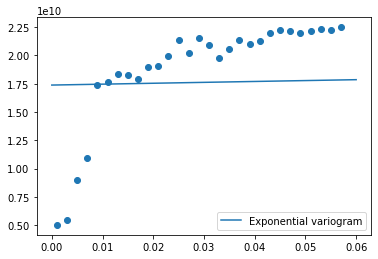

In [60]:
# fit_model = gs.Stable(dim=2)
fit_model = gs.Exponential(dim=2)

fit_model.fit_variogram(bin_center, gamma, nugget=True)

ax = fit_model.plot(x_max=0.06)
ax.scatter(bin_center, gamma)

In [61]:
fit_model

Exponential(dim=2, var=1.89e+10, len_scale=2.35, nugget=1.74e+10)

In [ ]:
# # enclosing box for data points
# grid_lat = np.linspace(np.min(positions[0]), np.max(positions[0]))
# grid_lon = np.linspace(np.min(positions[1]), np.max(positions[1]))

# krige = gs.krige.Ordinary(fit_model, positions, field, fit_variogram=True)
# krige.structured((grid_lat, grid_lon))

# # plot the result
# krige.plot()
# # show the fitting results
# print(krige.model)